In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris, load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving letter-recognition.csv to letter-recognition.csv


In [3]:
df = pd.read_csv('letter-recognition.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
X = df.drop('letter', axis=1)
y = df['letter']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [7]:
y_pred = svm_model.predict(X_test)

Accuracy: 0.9305


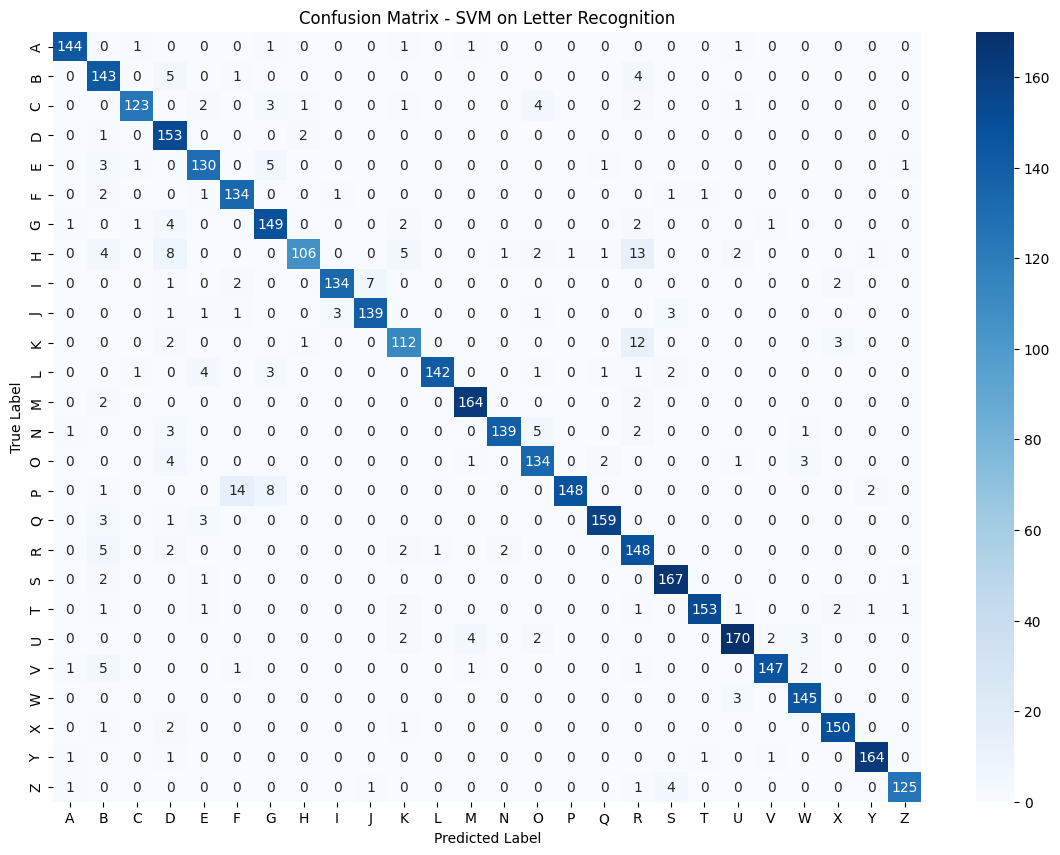

In [9]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df['letter'].unique()),
            yticklabels=sorted(df['letter'].unique()))
plt.title("Confusion Matrix - SVM on Letter Recognition")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

AUC Score (macro-averaged): 0.9985048363617783


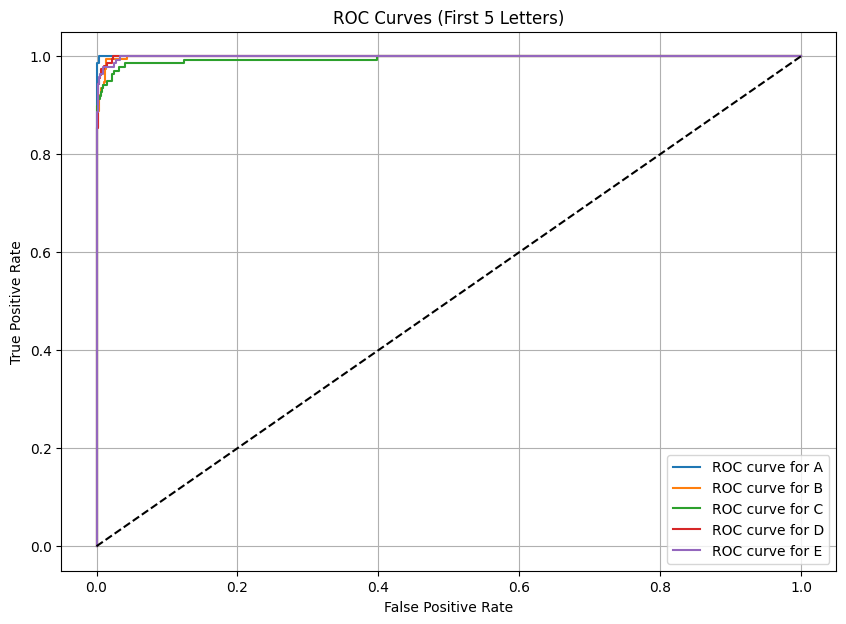

In [17]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_score = svm_model.predict_proba(X_test)

auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
print("AUC Score (macro-averaged):", auc)
fpr = {}
tpr = {}
plt.figure(figsize=(10, 7))
for i, letter in enumerate(lb.classes_[:5]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for {letter}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (First 5 Letters)')
plt.legend()
plt.grid(True)
plt.show()